In [21]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
mnist = pd.read_csv('mnist_train.csv')

In [4]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = mnist.drop('label',axis=1)
label = mnist['label']

In [6]:
data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
label

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [8]:
standardised_data = StandardScaler().fit_transform(data)

In [9]:
standardised_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
type(standardised_data)

numpy.ndarray

In [11]:
d = standardised_data[0:1000,:]

In [12]:
l = label[0:1000]

In [13]:
d.shape

(1000, 784)

In [14]:
l.shape

(1000,)

In [15]:
tsne = TSNE(n_components = 2,random_state=45)
tdata = tsne.fit_transform(d)

In [16]:
tdf = pd.DataFrame(data=tdata,columns=['Dim1','Dim2'])

In [17]:
tdata.shape

(1000, 2)

In [18]:
tdf

,Dim1,Dim2
0,-10.954876,10.166626
1,-6.277448,-40.651394
2,-7.734490,-5.856679
3,-29.790220,-13.889296
4,12.065390,-55.464355
...,...,...
995,29.411703,-11.747273
996,-31.805218,5.046196
997,-11.721610,37.474014
998,11.196635,-33.501930


In [19]:
tdf['labels'] = l

In [20]:
tdf.columns

Index(['Dim1', 'Dim2', 'labels'], dtype='object')

In [30]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

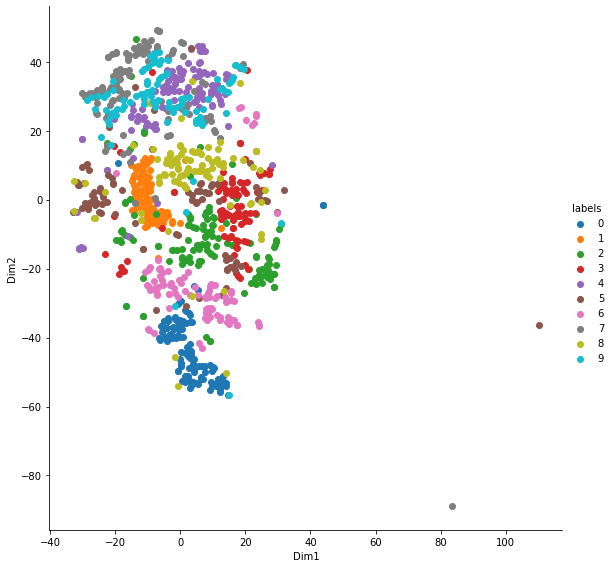

In [32]:
sns.FacetGrid(tdf,hue='labels',size = 8).map(plt.scatter,'Dim1','Dim2').add_legend()

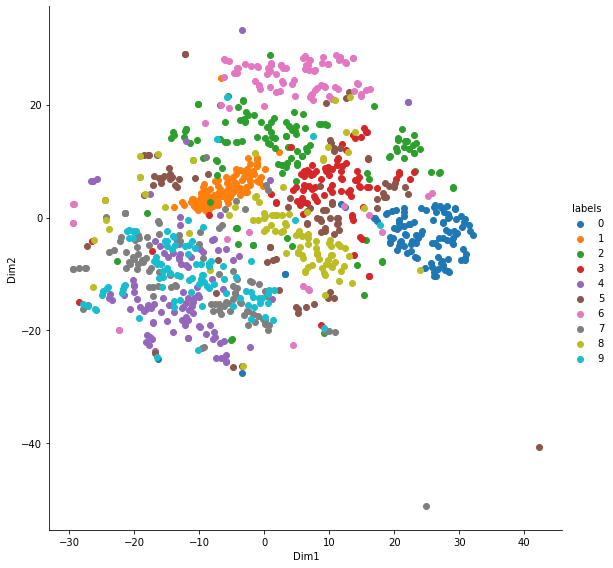

In [46]:
tsne = TSNE(n_components = 2,random_state=45,perplexity=50,n_iter=500)
tdata = tsne.fit_transform(d)

tdf = pd.DataFrame(data=tdata,columns=['Dim1','Dim2'])

tdata.shape

tdf

tdf['labels'] = l

tdf.columns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

sns.FacetGrid(tdf,hue='labels',size = 8).map(plt.scatter,'Dim1','Dim2').add_legend()

**Observation**


For perplexity=50 and step_size = 500 
we see that the class lables are well clustered and it is possible to clearly group the classes


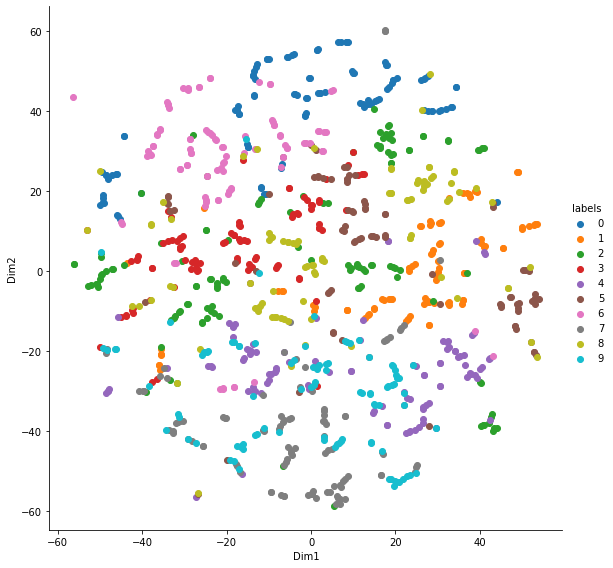

In [35]:
tsne = TSNE(n_components = 2,random_state=45,perplexity=2,n_iter=500)
tdata = tsne.fit_transform(d)

tdf = pd.DataFrame(data=tdata,columns=['Dim1','Dim2'])

tdata.shape

tdf

tdf['labels'] = l

tdf.columns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

sns.FacetGrid(tdf,hue='labels',size = 8).map(plt.scatter,'Dim1','Dim2').add_legend()

**Observation**

For perplexity = 2 and step_size = 500, we see that in every cluster we will have 3 points
The classes are all jumbled 

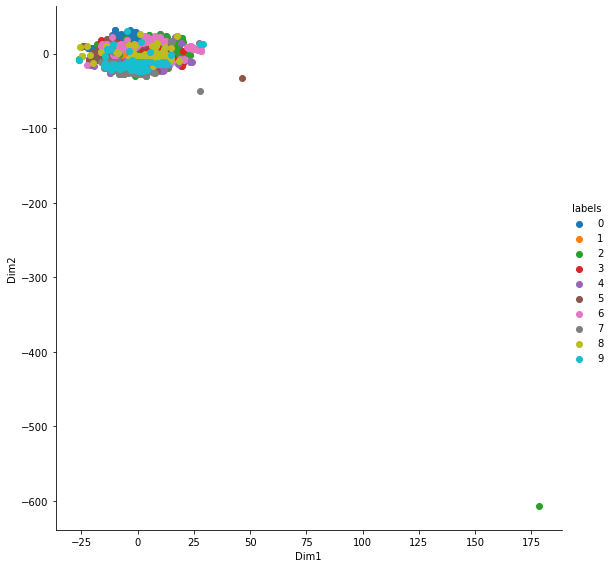

In [40]:
tsne = TSNE(n_components = 2,random_state=45,perplexity=100,n_iter=500)
tdata = tsne.fit_transform(d)

tdf = pd.DataFrame(data=tdata,columns=['Dim1','Dim2'])

tdata.shape

tdf

tdf['labels'] = l

tdf.columns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

sns.FacetGrid(tdf,hue='labels',size = 8).map(plt.scatter,'Dim1','Dim2').add_legend()

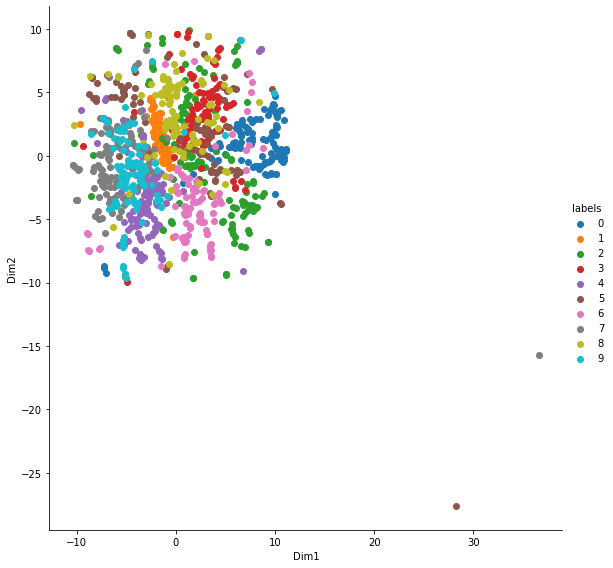

In [41]:
tsne = TSNE(n_components = 2,random_state=45,perplexity=250,n_iter=500)
tdata = tsne.fit_transform(d)

tdf = pd.DataFrame(data=tdata,columns=['Dim1','Dim2'])

tdata.shape

tdf

tdf['labels'] = l

tdf.columns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

sns.FacetGrid(tdf,hue='labels',size = 8).map(plt.scatter,'Dim1','Dim2').add_legend()

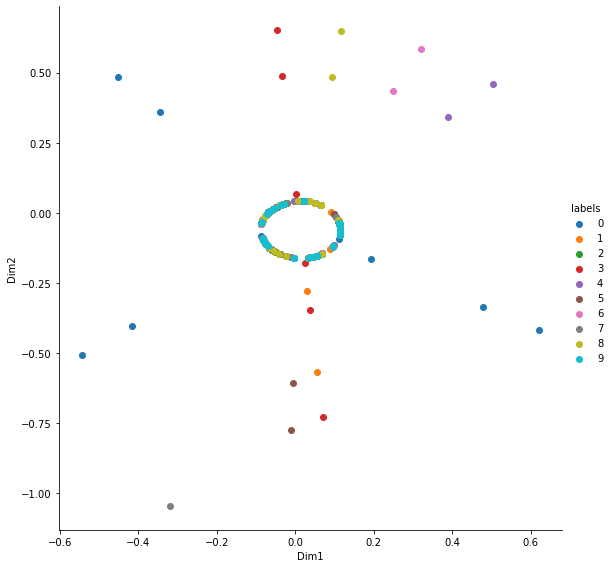

In [43]:
tsne = TSNE(n_components = 2,random_state=45,perplexity=1000,n_iter=500)
tdata = tsne.fit_transform(d)

tdf = pd.DataFrame(data=tdata,columns=['Dim1','Dim2'])

tdata.shape

tdf

tdf['labels'] = l

tdf.columns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

sns.FacetGrid(tdf,hue='labels',size = 8).map(plt.scatter,'Dim1','Dim2').add_legend()

**Obsercation**

perplexity = 100,step_size = 500

Here we observe that the perplexity value is equivalent to the number of points in the dataset
From the plot we can see that that the points are highly ovelapped on top of one anoother